In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(city_data, ride_data, on="city", how="outer")

# Display the data table for preview
merge_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


### Average Fare ($) Per City

In [2]:
# Group by Cities
group_city = merge_data.groupby(['city'])

# Get the average fare per city
avg_fare = group_city['fare'].mean()
avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Barronchester      36.422500
Bethanyland        32.956111
Bradshawfurt       40.064000
Brandonfort        35.437368
Carriemouth        28.314444
Christopherfurt    24.501852
Colemanland        30.894545
Davidfurt          31.995882
Name: fare, dtype: float64

### Total Number of Rides Per City

In [3]:
rides_per_city = group_city['ride_id'].count()
rides_per_city.head(10)

city
Amandaburgh        18
Barajasview        22
Barronchester      16
Bethanyland        18
Bradshawfurt       10
Brandonfort        19
Carriemouth        27
Christopherfurt    27
Colemanland        22
Davidfurt          17
Name: ride_id, dtype: int64

### Total Number of Drivers Per City

In [4]:
drivers_per_city = group_city['driver_count'].count()
drivers_per_city.head(10)

city
Amandaburgh        18
Barajasview        22
Barronchester      16
Bethanyland        18
Bradshawfurt       10
Brandonfort        19
Carriemouth        27
Christopherfurt    27
Colemanland        22
Davidfurt          17
Name: driver_count, dtype: int64

### City Type (Urban, Suburban, Rural)

In [5]:
city_type = city_data.set_index('city')['type']
city_type.head(10)

city
Richardfort      Urban
Williamsstad     Urban
Port Angela      Urban
Rodneyfort       Urban
West Robert      Urban
West Anthony     Urban
West Angela      Urban
Martinezhaven    Urban
Karenberg        Urban
Barajasview      Urban
Name: type, dtype: object

In [6]:
#Creating dataframe with the above data
pyber_city = pd.DataFrame({"Average Fare": avg_fare,
                          "Number of Rides": rides_per_city,
                          "Number of Drivers": drivers_per_city,
                          "City Type": city_type})
pyber_city = pyber_city.round(2)
pyber_city.head(10)

,Average Fare,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.64,18,18,Urban
Barajasview,25.33,22,22,Urban
Barronchester,36.42,16,16,Suburban
Bethanyland,32.96,18,18,Suburban
Bradshawfurt,40.06,10,10,Rural
Brandonfort,35.44,19,19,Suburban
Carriemouth,28.31,27,27,Urban
Christopherfurt,24.50,27,27,Urban
Colemanland,30.89,22,22,Suburban
Davidfurt,32.00,17,17,Suburban


## Bubble Plot of Ride Sharing Data

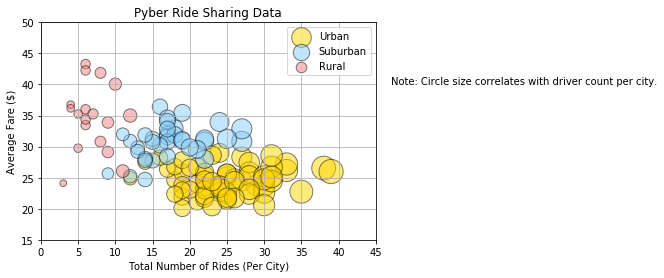

In [7]:
# Obtain the x and y coordinates for each of the three city types
urban = pyber_city.loc[pyber_city["City Type"]=="Urban"]
suburban = pyber_city.loc[pyber_city["City Type"]=="Suburban"]
rural = pyber_city.loc[pyber_city["City Type"]=="Rural"]

# Build the scatter plots for each city types
plt.scatter(urban["Number of Rides"], urban["Average Fare"], s=urban["Number of Drivers"]*15, color="gold", edgecolor="black", alpha=.5, label="Urban")
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], s=suburban["Number of Drivers"]*15, color="lightskyblue", edgecolor="black", alpha=0.5, label="Suburban")
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s=rural["Number of Drivers"]*15, color="lightcoral", edgecolor="black", alpha=0.5, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.ylim(15,50)
plt.xlim(0,45)

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(47, 40, "Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber.png")

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

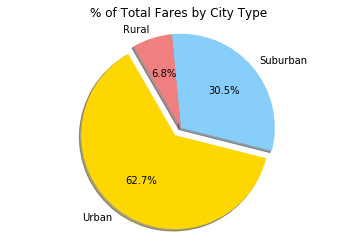

In [23]:
# Calculate Type Percents
total_fare = merge_data["fare"].sum()
urban_sum = merge_data.fare[merge_data["type"]=="Urban"].sum()
suburban_sum = merge_data.fare[merge_data["type"]=="Suburban"].sum()
rural_sum = merge_data.fare[merge_data["type"]=="Rural"].sum()

urban_fare = urban_sum / total_fare 
suburban_fare = suburban_sum / total_fare
rural_fare = rural_sum / total_fare

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fare, suburban_fare, rural_fare]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Fares_by_city_pie.png")

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

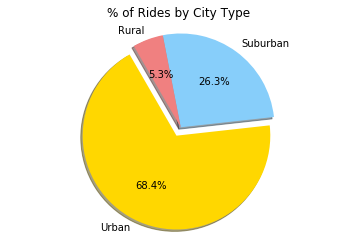

In [28]:
# Calculate Ride Percents
total_rides = merge_data["ride_id"].count()
urban_ride_sum = merge_data.ride_id[merge_data["type"]=="Urban"].count()
suburban_ride_sum = merge_data.ride_id[merge_data["type"]=="Suburban"].count()
rural_ride_sum = merge_data.ride_id[merge_data["type"]=="Rural"].count()

urban_rides = urban_ride_sum / total_rides
suburban_rides = suburban_ride_sum / total_rides
rural_rides = rural_ride_sum / total_rides

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_rides, suburban_rides, rural_rides]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Rides_by_City_pie.png")


In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

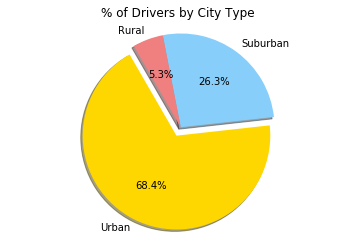

In [36]:
# Calculate Driver Percents
total_drivers = pyber_city["Number of Drivers"].sum()
urban_drivers_sum = pyber_city["Number of Drivers"][pyber_city["City Type"]=="Urban"].sum()
suburban_drivers_sum = pyber_city["Number of Drivers"][pyber_city["City Type"]=="Suburban"].sum()
rural_drivers_sum = pyber_city["Number of Drivers"][pyber_city["City Type"]=="Rural"].sum()

urban_drivers = urban_drivers_sum / total_drivers
suburban_drivers = suburban_drivers_sum / total_drivers
rural_drivers = rural_drivers_sum / total_drivers

# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_drivers, suburban_drivers, rural_drivers]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Images/Drivers_by_City_pie.png")


In [37]:
# Show Figure
plt.show()